 #### Necessary Libraries

In [1]:
import pandas as pd
import os

#### Merging 12 Months of Data into One

In [2]:
#Read the files names

path = './data'
for file in os.listdir(path):
    if not file.startswith('.'):
        files = os.listdir(path) 
        

#Merge the file into one
sales_data = pd.DataFrame()

for file in files:
    file_data = pd.read_csv(path + '/'+ file, sep =',')
    sales_data = pd.concat([sales_data, file_data])
    
sales_data.to_csv(path+'/sales_data.csv', index=False)

#### Read the combined data to sdata Data Frame

In [3]:
sdata = pd.read_csv(path+'/sales_data.csv', sep = ',')
sdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


#### Clean the Data

##### Task 1: Drop Rows of NAN

In [4]:
# Finding the NAN rows
Nan_rows = sdata[sdata.isna().any(axis = 1 )]
display(Nan_rows.shape)

#Dropping the NAN rows
sdata.dropna(how='all', axis=0, inplace = True)

(1090, 6)

##### Task 2: Find 'Or' and Delete it

In [5]:
or_rows = sdata[sdata['Order Date'].str[0:2] == 'Or']

sdata = sdata[sdata['Order Date'].str[0:2] != 'Or']

##### Cast Columns to Correct Type

In [6]:
sdata['Quantity Ordered'] = pd.to_numeric(sdata['Quantity Ordered'])
sdata['Price Each'] = pd.to_numeric(sdata['Price Each'])

 #### Add Additional Necessary Columns

###### Task 1: Add Month Column

In [7]:
sdata['Month'] = sdata['Order Date'].str[0:2]
sdata['Month'] = sdata['Month'].astype(int)

sdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10


###### Alternative

In [8]:
sdata['Month 2'] = pd.to_datetime(sdata['Order Date']).dt.month
sdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,10


###### Add a Sales Column

In [9]:
sdata['Revenue'] = sdata['Quantity Ordered'].astype('int') * sdata['Price Each'].astype('float')

###### Add a City Column

In [10]:
def get_city(address):
    return address.split(',')[1].strip(' ')

def get_state(address):
    return address.split(',')[2].split(' ')[1]

sdata['City'] = sdata['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

##### Question 1: What was the best month for sales?How much was earned in that month?

In [11]:
month_sales = sdata.groupby(['Month']).sum()
month_sales.drop(['Month 2'], axis = 1, inplace=True)
month_sales.reset_index(inplace=True)

#Sorting Revenue from highest to lowest
month_sales.sort_values(by=['Revenue'], axis=0, ascending=False)


,Month,Quantity Ordered,Price Each,Revenue
11,12,56228,9.176831e+06,9.226887e+06
9,10,45406,7.431110e+06,7.473454e+06
3,4,41116,6.735342e+06,6.781340e+06
10,11,39596,6.361201e+06,6.399206e+06
4,5,37334,6.270250e+06,6.305214e+06
2,3,34010,5.582416e+06,5.614201e+06
6,7,32144,5.265079e+06,5.295552e+06
5,6,30506,5.124051e+06,5.155605e+06
7,8,26896,4.460691e+06,4.488936e+06
1,2,26898,4.377769e+06,4.404045e+06


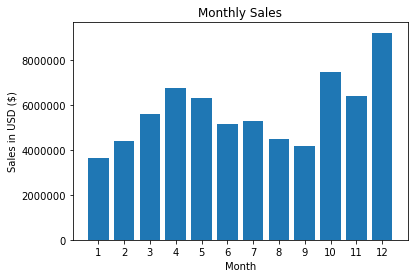

In [12]:
# Importing the pyplot namespace
import matplotlib.pyplot as plt  

plt.bar(month_sales['Month'], month_sales['Revenue'])

plt.title('Monthly Sales')

plt.xticks(month_sales['Month'])
plt.xlabel('Month')

plt.ylabel('Sales in USD ($)')

# Removes Scientific notation
plt.ticklabel_format(style='plain')

plt.show()

##### Question 2:  What city sold the most product?

In [13]:
city_sales = sdata.groupby(['City']).sum()

city_sales.reset_index(inplace=True)
city_sales.drop(['Month 2'], axis = 1, inplace=True)

display(city_sales.sort_values(by=['Revenue'], ascending= False))

,City,Quantity Ordered,Price Each,Month,Revenue
8,San Francisco (CA),100478,1.642292e+07,631040,1.652441e+07
4,Los Angeles (CA),66578,1.084287e+07,416650,1.090514e+07
5,New York City (NY),55864,9.270742e+06,351482,9.328635e+06
2,Boston (MA),45056,7.274820e+06,282224,7.323284e+06
0,Atlanta (GA),33204,5.559816e+06,209588,5.590997e+06
3,Dallas (TX),33460,5.505256e+06,209240,5.535951e+06
9,Seattle (WA),33106,5.466592e+06,209882,5.495511e+06
7,Portland (OR),22606,3.721116e+06,141242,3.741465e+06
1,Austin (TX),22306,3.619747e+06,139658,3.639164e+06
6,Portland (ME),5500,8.943785e+05,34288,8.995165e+05


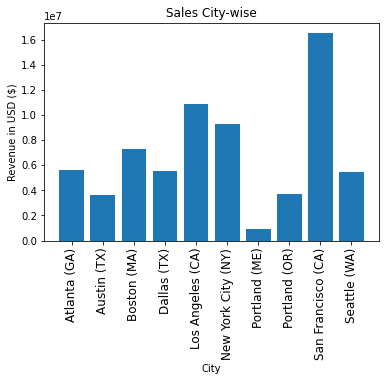

In [14]:
plt.bar(city_sales['City'], city_sales['Revenue'])

plt.title('Sales City-wise')

plt.xticks(city_sales['City'], rotation = 'vertical', size=12)
plt.xlabel('City')
plt.ylabel('Revenue in USD ($)')

plt.show()

##### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [15]:
# Create a hour column
sdata['Hour'] = pd.to_datetime(sdata['Order Date']).dt.hour
sdata['Count'] = 1

sdata.groupby(['Hour']).count()['Count']

Hour
0      7820
1      4700
2      2486
3      1662
4      1708
5      2642
6      4964
7      8022
8     12512
9     17496
10    21888
11    24822
12    25174
13    24258
14    21968
15    20350
16    20768
17    21798
18    24560
19    25810
20    24456
21    21842
22    17644
23    12550
Name: Count, dtype: int64

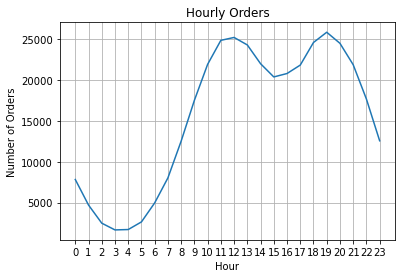

In [16]:
#Plotting Hourly Orders Line Graph
keys = [pair for pair, df in sdata.groupby(['Hour'])]

plt.plot(keys, sdata.groupby(['Hour']).count()['Count'])

plt.title('Hourly Orders')

plt.xticks(keys)
plt.xlabel('Hour')

plt.ylabel('Number of Orders')

plt.grid()

plt.show()

# Before the Peak Hours(11am and 7pm)

##### Question 4: What products are most often sold together?

In [ ]:
# Creating a DataFrame with Products Appearing on similar orders
ID_data = sdata[sdata.duplicated('Order ID', keep=False)]

ID_data['2Products'] = ID_data.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))
Prodp = ID_data[['Order ID', '2Products']].drop_duplicates()

Prodp

In [263]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in Prodp['2Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(20):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

##### Question 5: What product sold the most? Why do you think it sold the most?

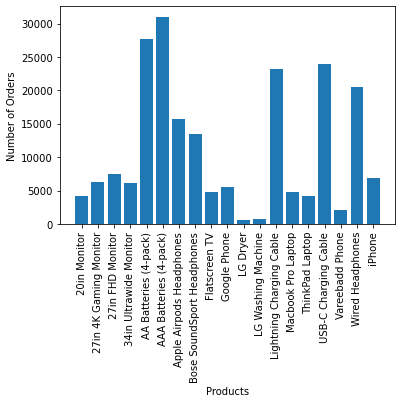

In [277]:
prod_sales = sdata.groupby(['Product'])
prod_orders = prod_sales.sum()['Quantity Ordered']

keys = [pair for pair, df in prod_sales]

plt.bar(keys, prod_orders)
plt.title('Product Orders')

plt.xticks(keys, rotation='vertical', size=10)
plt.xlabel('Products')

plt.ylabel('Number of Orders')

plt.show()

In [2]:
prices = sdata.groupby(['Product']).mean()['Price Each']

fig, ab1 = plt.subplots()

ab2 = ab1.twinx()

ab1.bar(keys, prod_orders, color='black')
ab2.plot(keys, prices, color = 'red')

ab1.set_xticklabels(keys, rotation='vertical', size=10)
ab1.set_xlabel('Products')

ab1.set_ylabel('Number of Orders')
ab2.set_ylabel('Mean Price in USD ($)')

fig.show()

NameError: name 'sdata' is not defined